# Baseline LSTM


In [1]:
import pandas as pd
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from matplotlib import pyplot as plt
import seaborn as sns
import os
from matplotlib.widgets import Slider
import glob
import h5py
from datahelpers import DemandGridDataset
from model.models import LSTMModel
from datetime import datetime
from datahelpers import standardize_grid
import json
from IPython.display import clear_output

def set_seed(seed: int):
    torch.manual_seed(seed)
    np.random.seed(seed)
set_seed(100)

In [2]:
SEGMENT_MIN=60
VERTICAL_LINES=4
HORIZONTAL_LINES=4
DATA_PATH="datasets/"
SUBSET = True
DATA_PREFIX="greenmobility_demand_prediction"
if SUBSET:
    DATA_PREFIX+='_CPH_SUB'
SEQ_LEN_SLICES=72
TEST=False
if TEST:
    DATA_PREFIX="test_"+DATA_PREFIX
    SEQ_LEN_SLICES=1

STANDARDIZE = False
RETURN_FEATURES = False


# For saving
MODEL_NAME="Vanilla_LSTM_1_step_model"

In [3]:
# Params
batch_size = 1

# Load the dataset 
t1=datetime.now()
train_data = DemandGridDataset(DATA_PATH+DATA_PREFIX+"_train.csv", 
                         vertical_lines=VERTICAL_LINES, 
                         horizontal_lines=HORIZONTAL_LINES,
                         SEGMENT_MIN=SEGMENT_MIN,
                               SEQ_LEN_SLICES=SEQ_LEN_SLICES,
                              train=True,
                               return_features=RETURN_FEATURES,
                              standardize=STANDARDIZE)
print("Traning loaded in: ",(datetime.now()-t1).seconds)

# Pass filters to validation and test
if STANDARDIZE:
    STANDARDIZE = (train_data.mean_grid, train_data.std_grid)

t2=datetime.now()
test_data = DemandGridDataset(DATA_PATH+DATA_PREFIX+"_test.csv", 
                         vertical_lines=VERTICAL_LINES, 
                         horizontal_lines=HORIZONTAL_LINES,
                         SEGMENT_MIN=SEGMENT_MIN,
                              SEQ_LEN_SLICES=SEQ_LEN_SLICES,
                              train=False,
                              return_features=RETURN_FEATURES, 
                              standardize=STANDARDIZE)
print("Test loaded in: ",(datetime.now()-t2).seconds)
t2=datetime.now()
validation_data = DemandGridDataset(DATA_PATH+DATA_PREFIX+"_validation.csv", 
                         vertical_lines=VERTICAL_LINES, 
                         horizontal_lines=HORIZONTAL_LINES,
                         SEGMENT_MIN=SEGMENT_MIN,
                                    SEQ_LEN_SLICES=SEQ_LEN_SLICES,
                              train=False,
                                    return_features=RETURN_FEATURES, 
                                    standardize=STANDARDIZE)
print("Validation loaded in: ",(datetime.now()-t2).seconds)
print("Initializing loaders")
train_loader = torch.utils.data.DataLoader(dataset=train_data, 
                                           batch_size=batch_size, 
                                           shuffle=False)

test_loader = torch.utils.data.DataLoader(dataset=test_data, 
                                          batch_size=batch_size, 
                                          shuffle=False)

validation_loader = torch.utils.data.DataLoader(dataset=validation_data, 
                                          batch_size=batch_size, 
                                          shuffle=False)
print("Total time:",(datetime.now()-t1).seconds)

Traning loaded in:  35
Test loaded in:  5
Validation loaded in:  1
Initializing loaders
Total time: 42


In [4]:
# Size of dim 0 of grid
input_dim = (HORIZONTAL_LINES+1)*(VERTICAL_LINES+1)
hidden_dim = 100
layer_dim = 1
output_dim = input_dim

In [5]:
model = LSTMModel(input_dim, hidden_dim, layer_dim, output_dim)

In [6]:
# Print model parameters
for i in range(len(list(model.parameters()))):
    print(list(model.parameters())[i].size())

torch.Size([400, 25])
torch.Size([400, 100])
torch.Size([400])
torch.Size([400])
torch.Size([25, 100])
torch.Size([25])


### Load model

In [7]:
LOAD_STATE = True
if LOAD_STATE:
    model.load_state_dict(torch.load('state_dict/5-5-LSTM-100LSTMModel_MSELoss_checkpoint_2020-12-29 19:05:45.588163', map_location='cpu'))

# Loss 

In [8]:
criterion = nn.MSELoss()

# Optimizer

In [9]:
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

# Traning

Below is the traning of the model

Start Iter
Start Validation
Done with 9% of train in epoch 0 
Seconds since start: 51 
Seconds since last status: 12
Done with 19% of train in epoch 0 
Seconds since start: 61 
Seconds since last status: 10
Done with 29% of train in epoch 0 
Seconds since start: 71 
Seconds since last status: 10
Done with 39% of train in epoch 0 
Seconds since start: 82 
Seconds since last status: 10
Done with 49% of train in epoch 0 
Seconds since start: 92 
Seconds since last status: 10
Done with 59% of train in epoch 0 
Seconds since start: 102 
Seconds since last status: 10
Done with 69% of train in epoch 0 
Seconds since start: 113 
Seconds since last status: 10
Done with 79% of train in epoch 0 
Seconds since start: 123 
Seconds since last status: 10
Done with 89% of train in epoch 0 
Seconds since start: 135 
Seconds since last status: 11
Done with 99% of train in epoch 0 
Seconds since start: 146 
Seconds since last status: 10
Epoch 0, training loss: 1.1414677432330338, validation loss: 3.38710

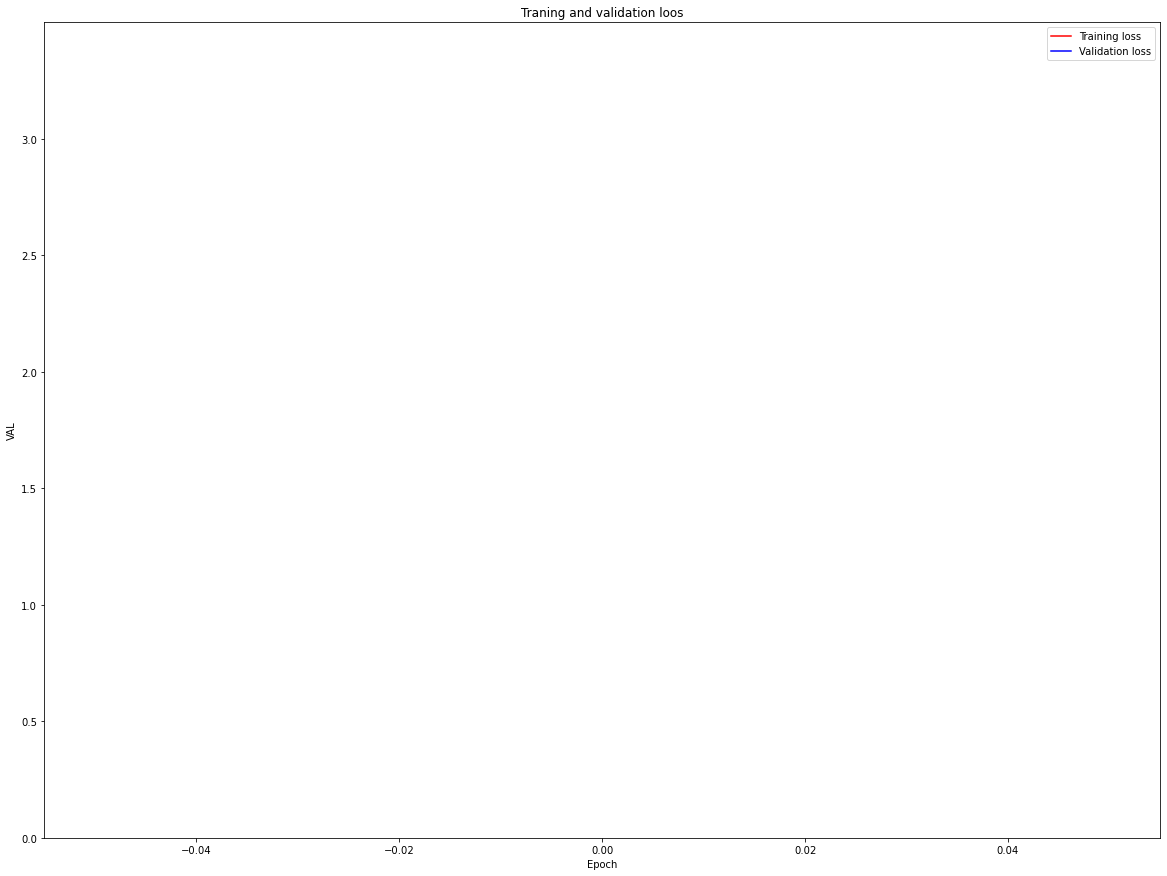

Start Validation
Done with 9% of train in epoch 1 
Seconds since start: 159 
Seconds since last status: 13
Done with 19% of train in epoch 1 
Seconds since start: 170 
Seconds since last status: 11
Done with 29% of train in epoch 1 
Seconds since start: 182 
Seconds since last status: 11
Done with 39% of train in epoch 1 
Seconds since start: 193 
Seconds since last status: 11
Done with 49% of train in epoch 1 
Seconds since start: 204 
Seconds since last status: 10
Done with 59% of train in epoch 1 
Seconds since start: 215 
Seconds since last status: 11
Done with 69% of train in epoch 1 
Seconds since start: 226 
Seconds since last status: 10
Done with 79% of train in epoch 1 
Seconds since start: 236 
Seconds since last status: 10
Done with 89% of train in epoch 1 
Seconds since start: 247 
Seconds since last status: 10
Done with 99% of train in epoch 1 
Seconds since start: 258 
Seconds since last status: 10
Epoch 1, training loss: 1.072417299620624, validation loss: 1.398122777620

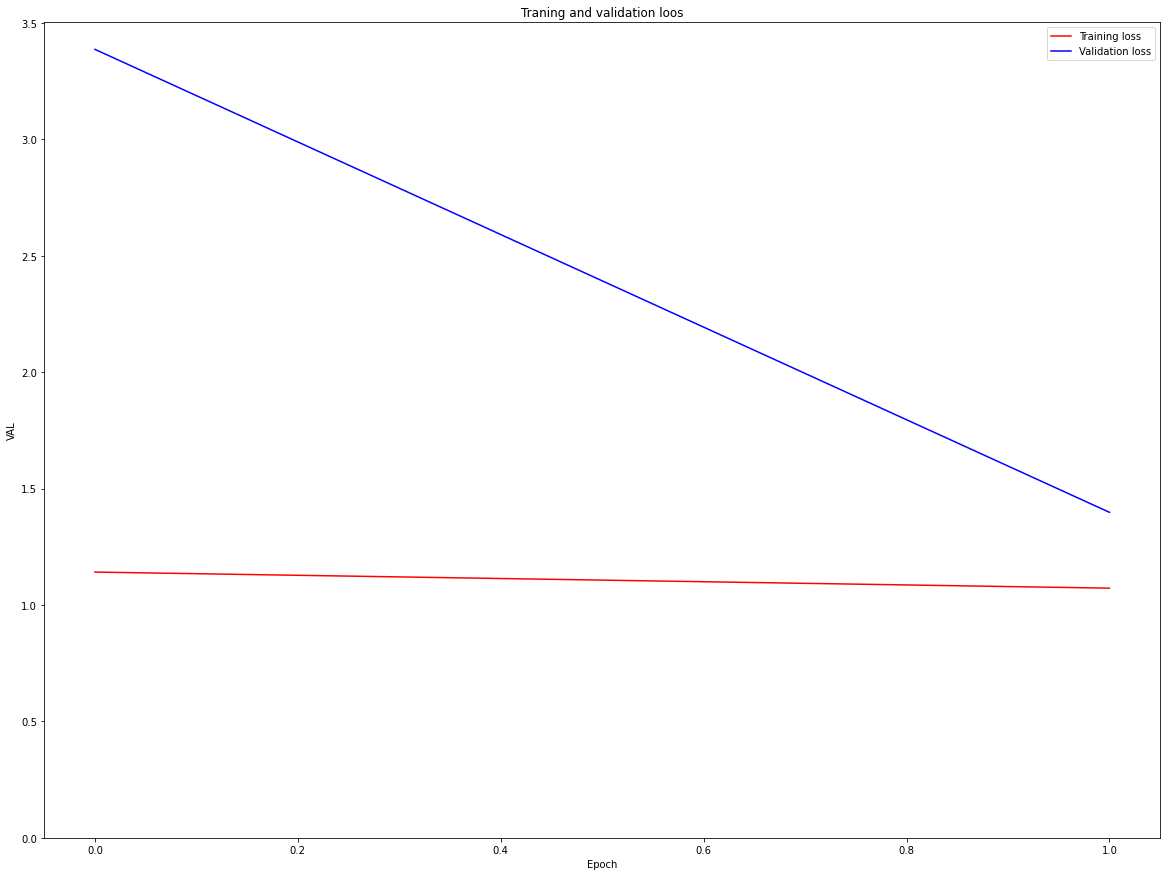

Start Validation
Done with 9% of train in epoch 2 
Seconds since start: 270 
Seconds since last status: 12
Done with 19% of train in epoch 2 
Seconds since start: 281 
Seconds since last status: 10
Done with 29% of train in epoch 2 
Seconds since start: 291 
Seconds since last status: 10
Done with 39% of train in epoch 2 
Seconds since start: 302 
Seconds since last status: 10
Done with 49% of train in epoch 2 
Seconds since start: 312 
Seconds since last status: 10
Done with 59% of train in epoch 2 
Seconds since start: 323 
Seconds since last status: 10
Done with 69% of train in epoch 2 
Seconds since start: 333 
Seconds since last status: 10
Done with 79% of train in epoch 2 
Seconds since start: 343 
Seconds since last status: 10
Done with 89% of train in epoch 2 
Seconds since start: 354 
Seconds since last status: 10
Done with 99% of train in epoch 2 
Seconds since start: 364 
Seconds since last status: 10
Epoch 2, training loss: 1.0551397903019826, validation loss: 1.37329869278

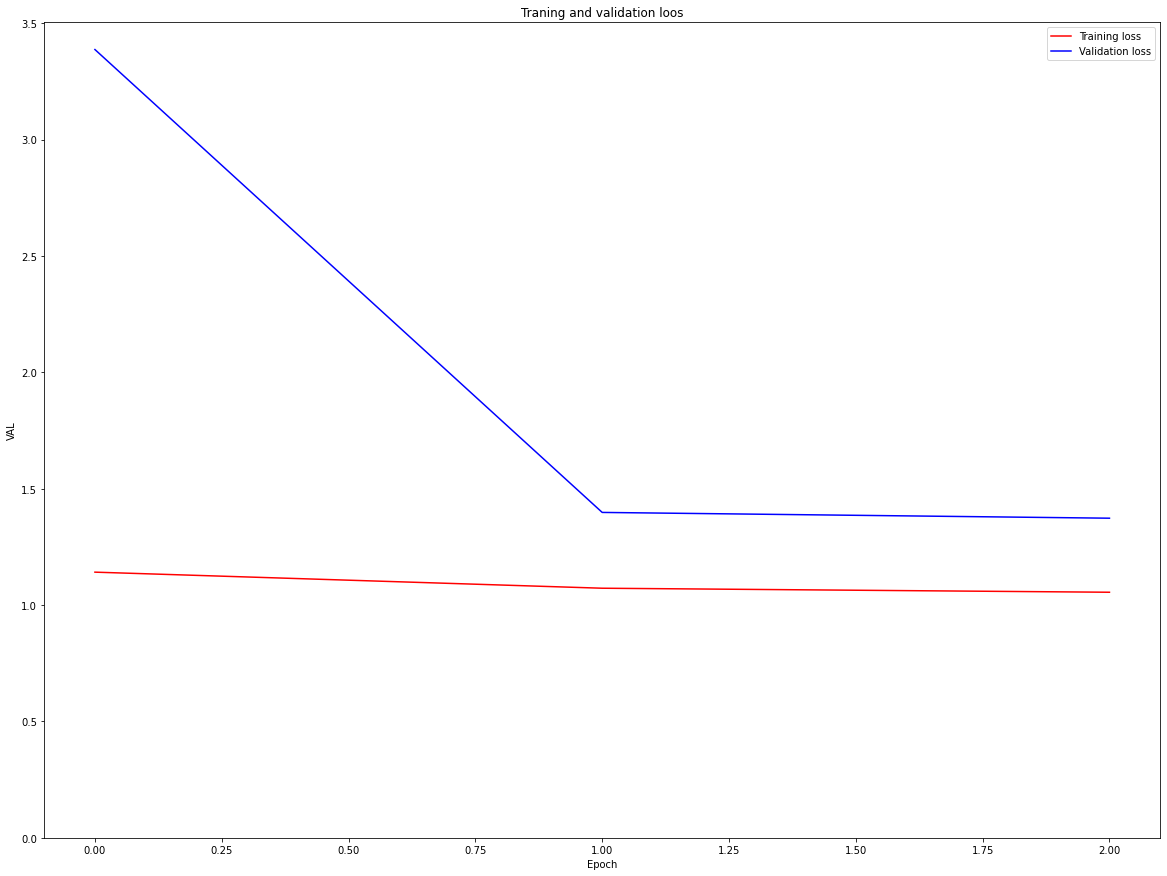

Start Validation
Done with 9% of train in epoch 3 
Seconds since start: 377 
Seconds since last status: 12
Done with 19% of train in epoch 3 
Seconds since start: 387 
Seconds since last status: 10
Done with 29% of train in epoch 3 
Seconds since start: 397 
Seconds since last status: 10
Done with 39% of train in epoch 3 
Seconds since start: 407 
Seconds since last status: 10
Done with 49% of train in epoch 3 
Seconds since start: 418 
Seconds since last status: 10
Done with 59% of train in epoch 3 
Seconds since start: 428 
Seconds since last status: 10
Done with 69% of train in epoch 3 
Seconds since start: 438 
Seconds since last status: 10
Done with 79% of train in epoch 3 
Seconds since start: 449 
Seconds since last status: 10
Done with 89% of train in epoch 3 
Seconds since start: 459 
Seconds since last status: 10
Done with 99% of train in epoch 3 
Seconds since start: 470 
Seconds since last status: 10
Epoch 3, training loss: 1.0388982131780538, validation loss: 1.36805666856

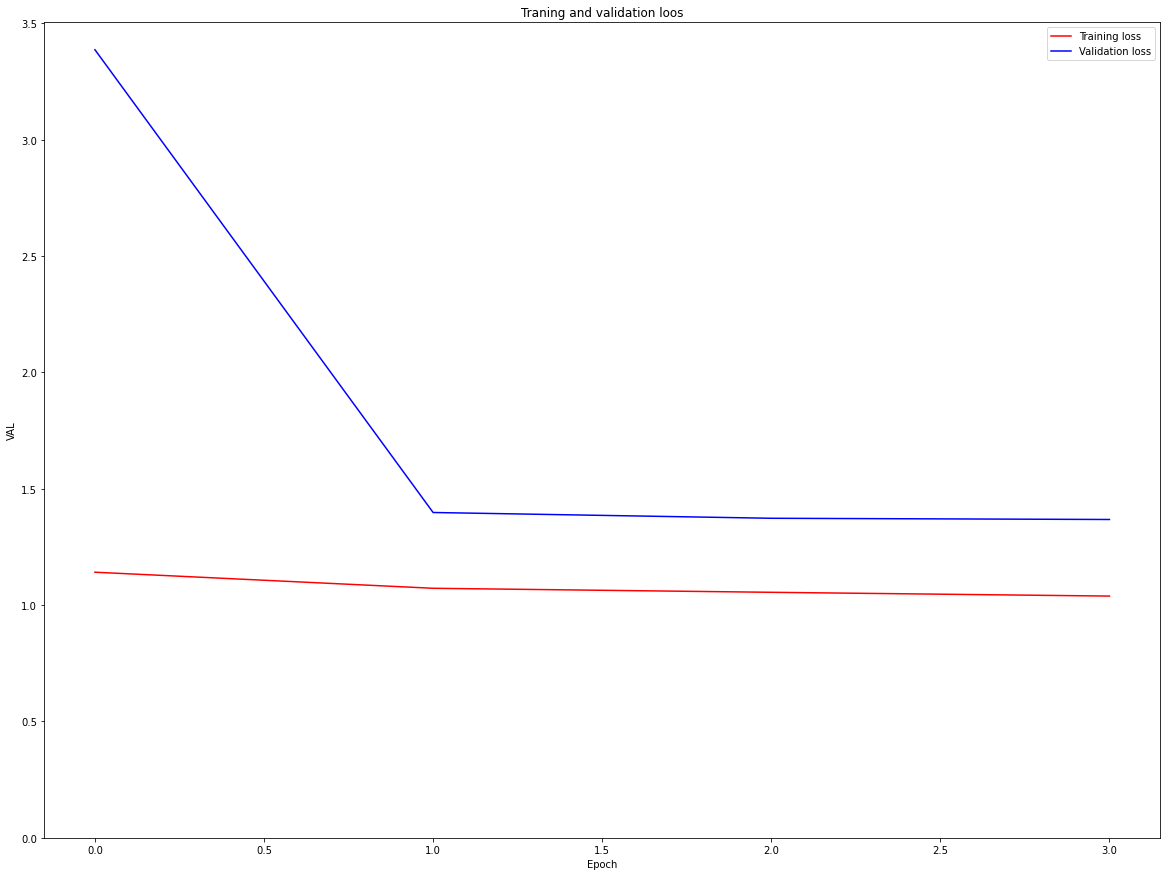

Start Validation
Done with 9% of train in epoch 4 
Seconds since start: 482 
Seconds since last status: 12
Done with 19% of train in epoch 4 
Seconds since start: 493 
Seconds since last status: 10
Done with 29% of train in epoch 4 
Seconds since start: 503 
Seconds since last status: 10
Done with 39% of train in epoch 4 
Seconds since start: 514 
Seconds since last status: 10
Done with 49% of train in epoch 4 
Seconds since start: 524 
Seconds since last status: 10
Done with 59% of train in epoch 4 
Seconds since start: 535 
Seconds since last status: 10
Done with 69% of train in epoch 4 
Seconds since start: 546 
Seconds since last status: 10
Done with 79% of train in epoch 4 
Seconds since start: 557 
Seconds since last status: 10
Done with 89% of train in epoch 4 
Seconds since start: 567 
Seconds since last status: 10
Done with 99% of train in epoch 4 
Seconds since start: 578 
Seconds since last status: 10
Epoch 4, training loss: 1.0266133642578195, validation loss: 1.35448553802

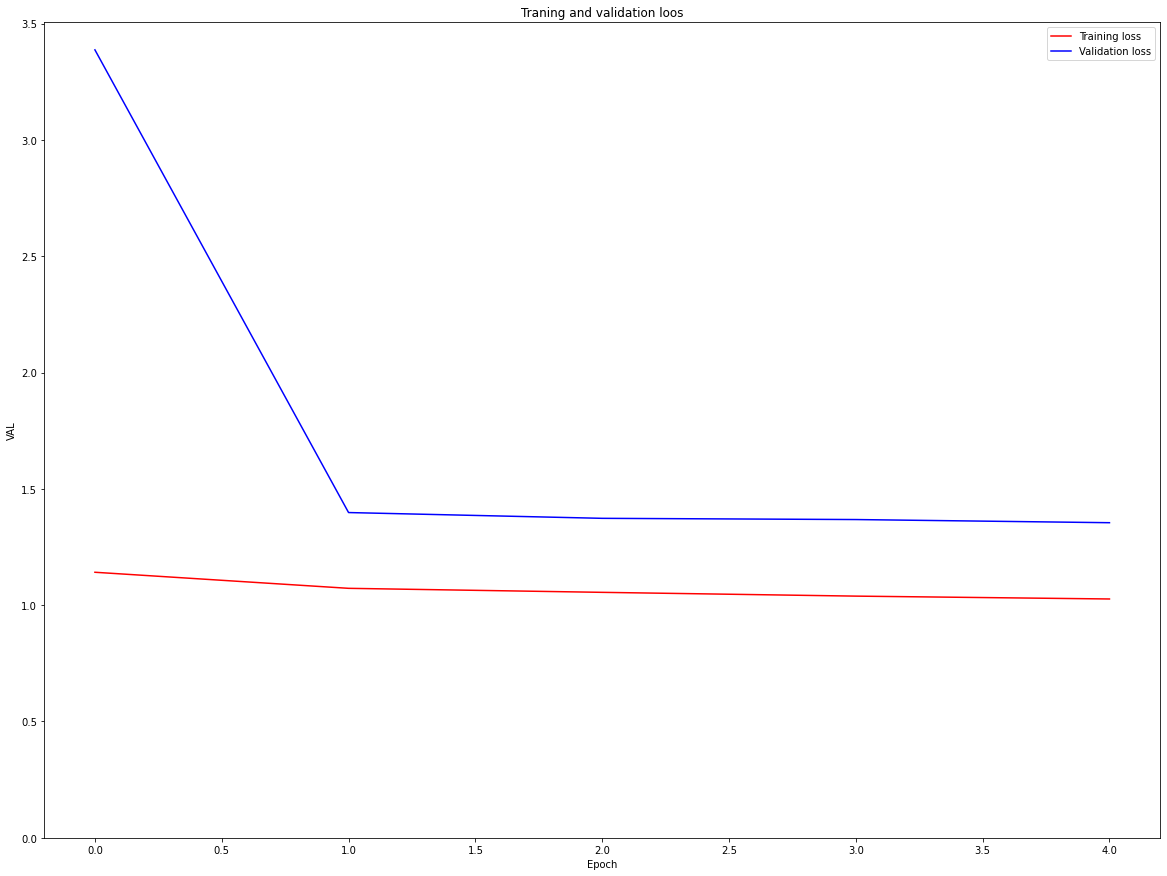

Start Validation
Done with 9% of train in epoch 5 
Seconds since start: 591 
Seconds since last status: 12
Done with 19% of train in epoch 5 
Seconds since start: 602 
Seconds since last status: 10
Done with 29% of train in epoch 5 
Seconds since start: 612 
Seconds since last status: 10
Done with 39% of train in epoch 5 
Seconds since start: 623 
Seconds since last status: 10
Done with 49% of train in epoch 5 
Seconds since start: 633 
Seconds since last status: 10
Done with 59% of train in epoch 5 
Seconds since start: 644 
Seconds since last status: 10
Done with 69% of train in epoch 5 
Seconds since start: 654 
Seconds since last status: 10
Done with 79% of train in epoch 5 
Seconds since start: 665 
Seconds since last status: 10
Done with 89% of train in epoch 5 
Seconds since start: 675 
Seconds since last status: 10
Done with 99% of train in epoch 5 
Seconds since start: 685 
Seconds since last status: 10
Epoch 5, training loss: 1.0137104622812332, validation loss: 1.37808089996

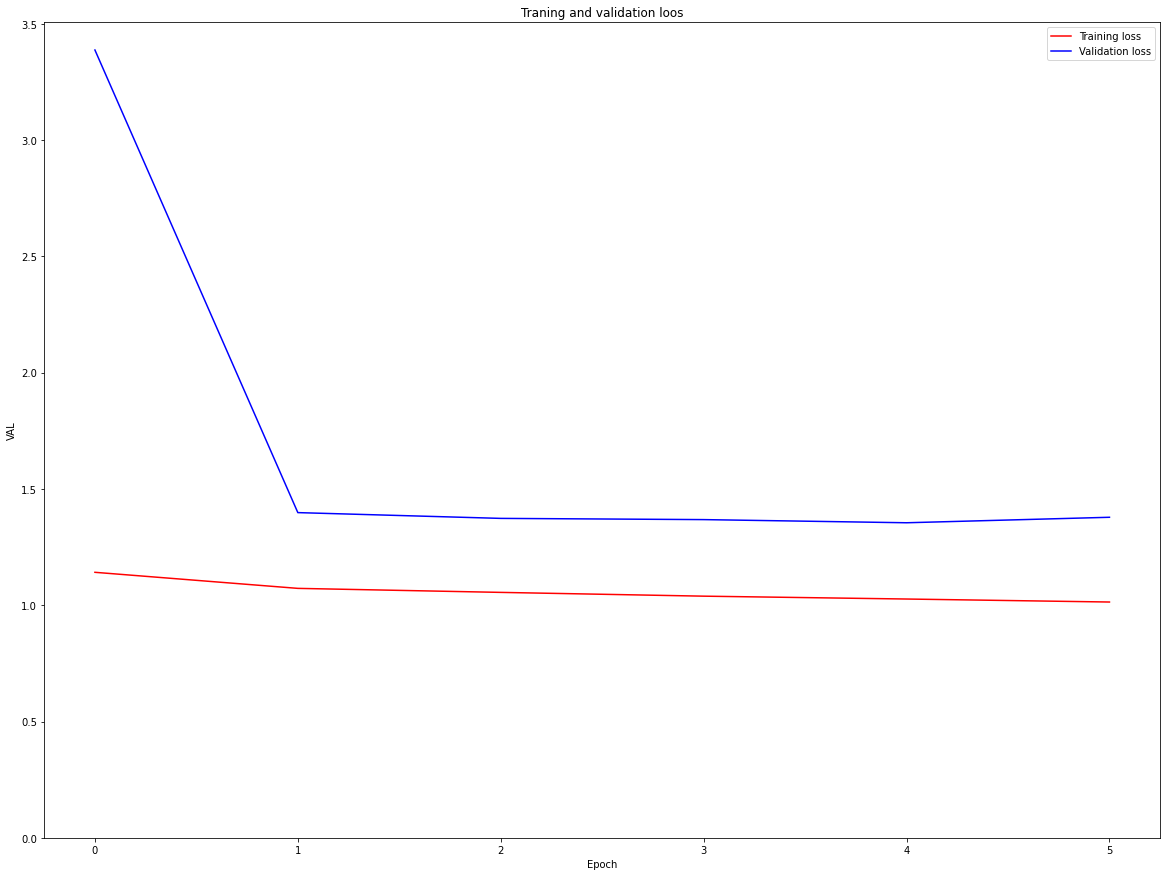

Start Validation
Done with 9% of train in epoch 6 
Seconds since start: 698 
Seconds since last status: 12
Done with 19% of train in epoch 6 
Seconds since start: 708 
Seconds since last status: 10
Done with 29% of train in epoch 6 
Seconds since start: 719 
Seconds since last status: 10
Done with 39% of train in epoch 6 
Seconds since start: 729 
Seconds since last status: 10
Done with 49% of train in epoch 6 
Seconds since start: 740 
Seconds since last status: 10
Done with 59% of train in epoch 6 
Seconds since start: 751 
Seconds since last status: 10
Done with 69% of train in epoch 6 
Seconds since start: 761 
Seconds since last status: 10
Done with 79% of train in epoch 6 
Seconds since start: 772 
Seconds since last status: 10
Done with 89% of train in epoch 6 
Seconds since start: 782 
Seconds since last status: 10
Done with 99% of train in epoch 6 
Seconds since start: 793 
Seconds since last status: 10
Epoch 6, training loss: 0.9984000212771643, validation loss: 1.37556985293

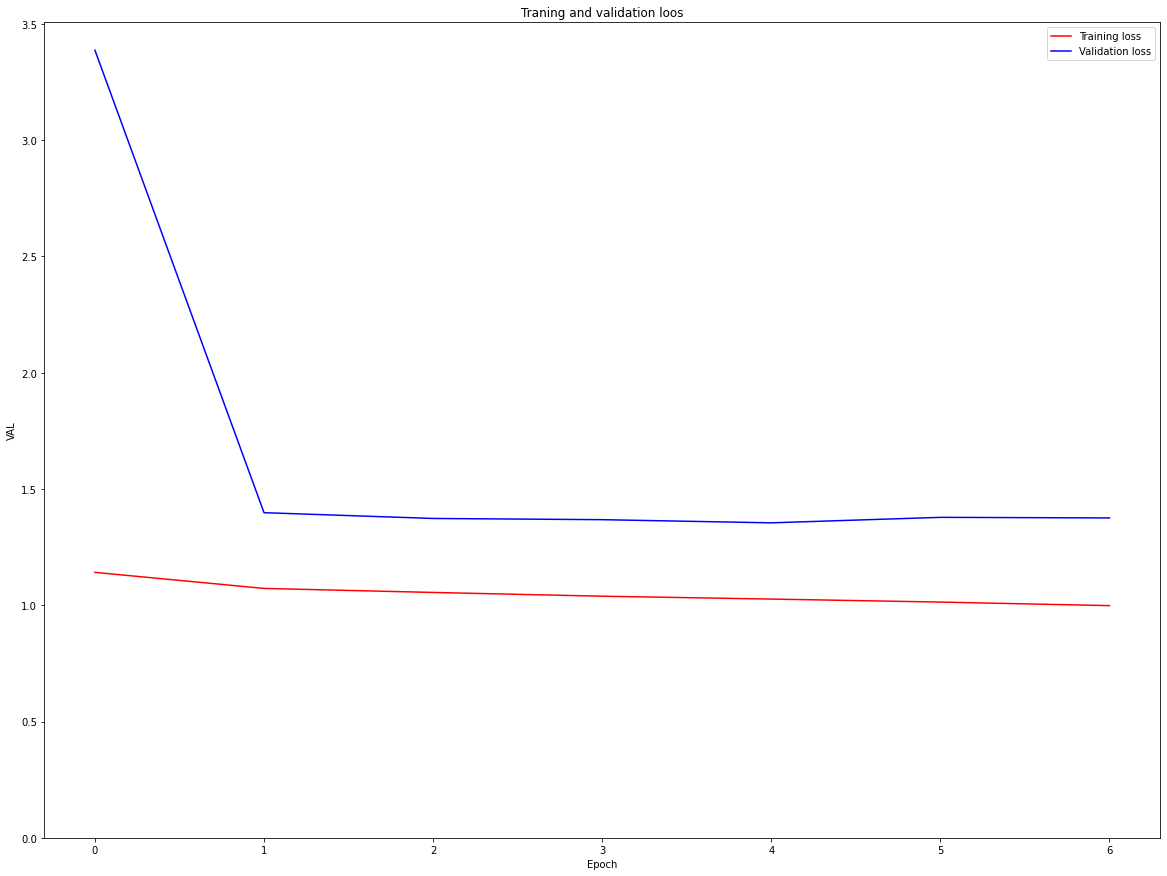

Start Validation
Done with 9% of train in epoch 7 
Seconds since start: 806 
Seconds since last status: 12
Done with 19% of train in epoch 7 
Seconds since start: 816 
Seconds since last status: 10
Done with 29% of train in epoch 7 
Seconds since start: 827 
Seconds since last status: 10
Done with 39% of train in epoch 7 
Seconds since start: 838 
Seconds since last status: 10
Done with 49% of train in epoch 7 
Seconds since start: 849 
Seconds since last status: 10
Done with 59% of train in epoch 7 
Seconds since start: 859 
Seconds since last status: 10
Done with 69% of train in epoch 7 
Seconds since start: 870 
Seconds since last status: 10
Done with 79% of train in epoch 7 
Seconds since start: 881 
Seconds since last status: 10
Done with 89% of train in epoch 7 
Seconds since start: 891 
Seconds since last status: 10
Done with 99% of train in epoch 7 
Seconds since start: 902 
Seconds since last status: 10
Epoch 7, training loss: 0.9828273264333752, validation loss: 1.36879545330

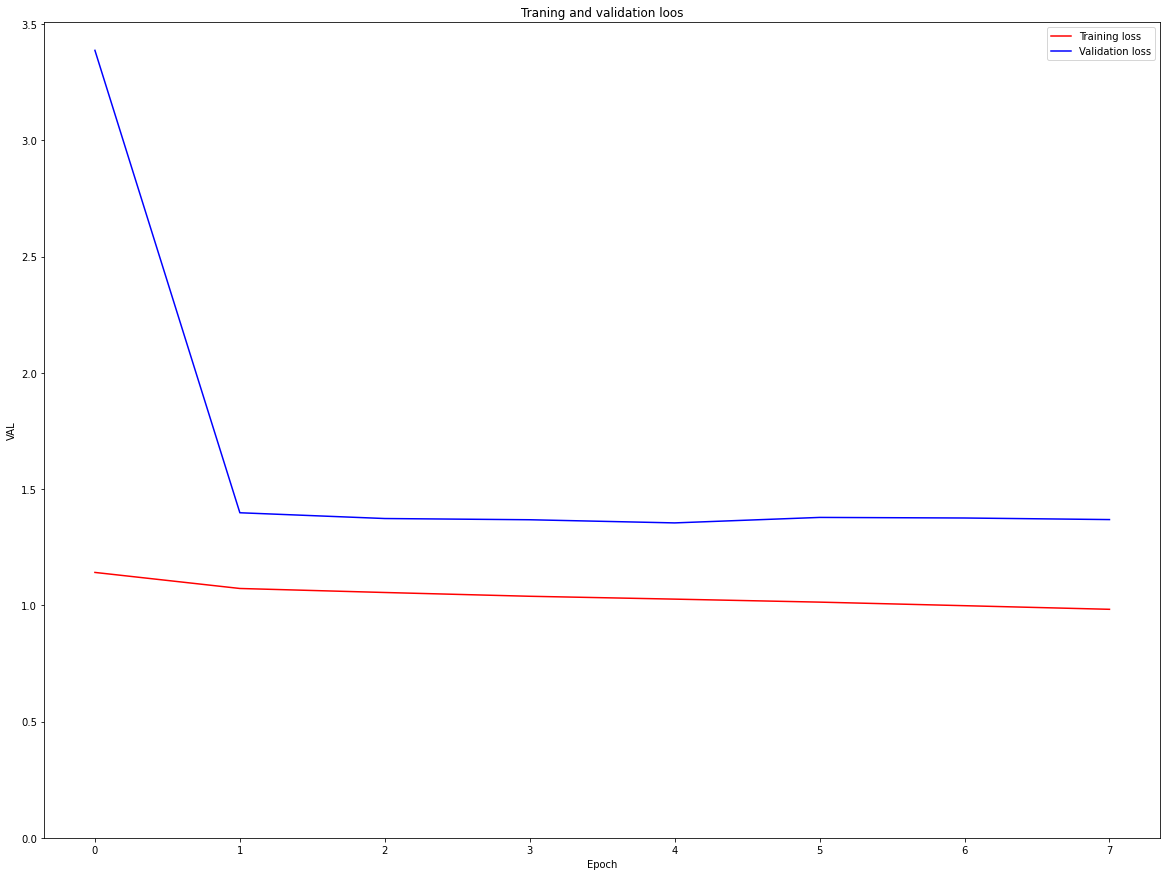

Start Validation
Done with 9% of train in epoch 8 
Seconds since start: 915 
Seconds since last status: 12
Done with 19% of train in epoch 8 
Seconds since start: 926 
Seconds since last status: 10
Done with 29% of train in epoch 8 
Seconds since start: 936 
Seconds since last status: 10
Done with 39% of train in epoch 8 
Seconds since start: 947 
Seconds since last status: 10
Done with 49% of train in epoch 8 
Seconds since start: 958 
Seconds since last status: 10
Done with 59% of train in epoch 8 
Seconds since start: 968 
Seconds since last status: 10
Done with 69% of train in epoch 8 
Seconds since start: 979 
Seconds since last status: 10
Done with 79% of train in epoch 8 
Seconds since start: 990 
Seconds since last status: 10
Done with 89% of train in epoch 8 
Seconds since start: 1000 
Seconds since last status: 10
Done with 99% of train in epoch 8 
Seconds since start: 1011 
Seconds since last status: 10
Epoch 8, training loss: 0.9673025197519703, validation loss: 1.357275217

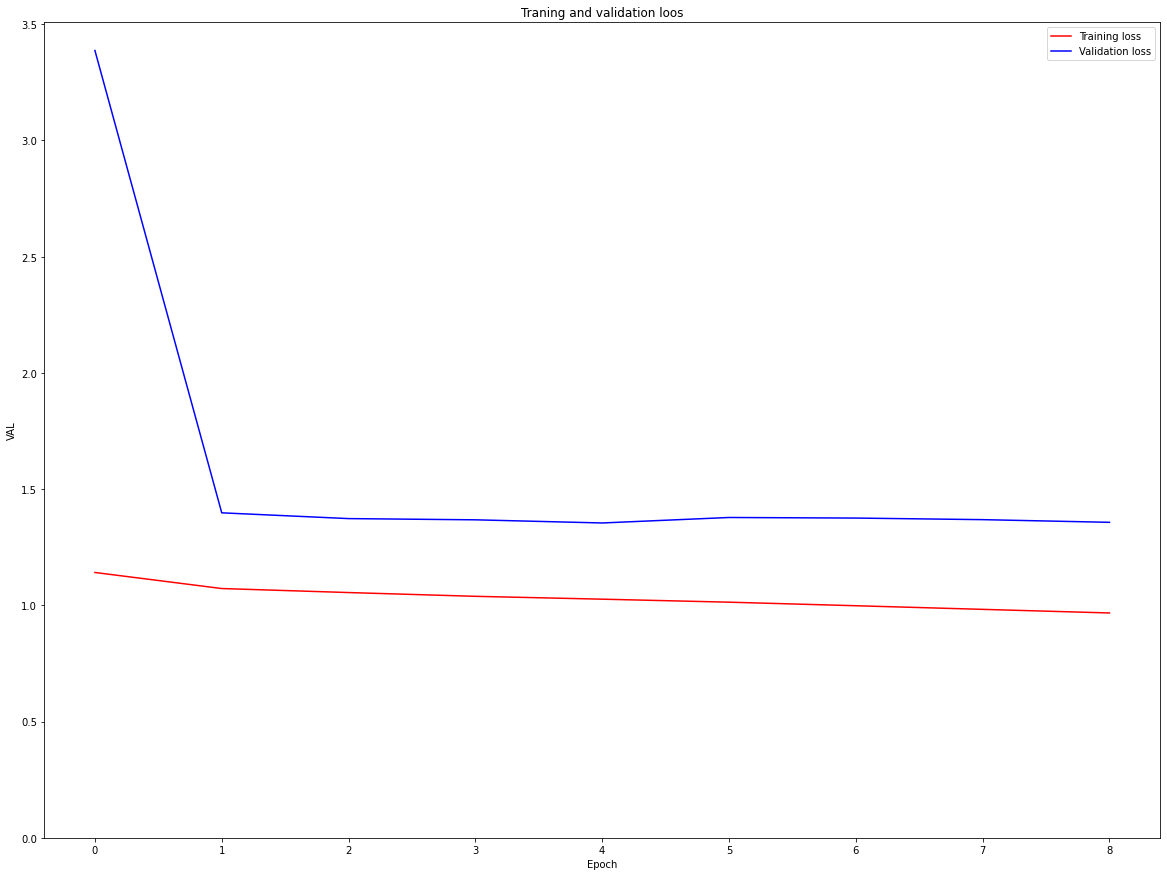

Start Validation
Done with 9% of train in epoch 9 
Seconds since start: 1024 
Seconds since last status: 12
Done with 19% of train in epoch 9 
Seconds since start: 1034 
Seconds since last status: 10
Done with 29% of train in epoch 9 
Seconds since start: 1045 
Seconds since last status: 10
Done with 39% of train in epoch 9 
Seconds since start: 1056 
Seconds since last status: 10
Done with 49% of train in epoch 9 
Seconds since start: 1066 
Seconds since last status: 10
Done with 59% of train in epoch 9 
Seconds since start: 1077 
Seconds since last status: 10
Done with 69% of train in epoch 9 
Seconds since start: 1088 
Seconds since last status: 10
Done with 79% of train in epoch 9 
Seconds since start: 1098 
Seconds since last status: 10
Done with 89% of train in epoch 9 
Seconds since start: 1109 
Seconds since last status: 10
Done with 99% of train in epoch 9 
Seconds since start: 1120 
Seconds since last status: 10
Epoch 9, training loss: 0.950451626670052, validation loss: 1.35

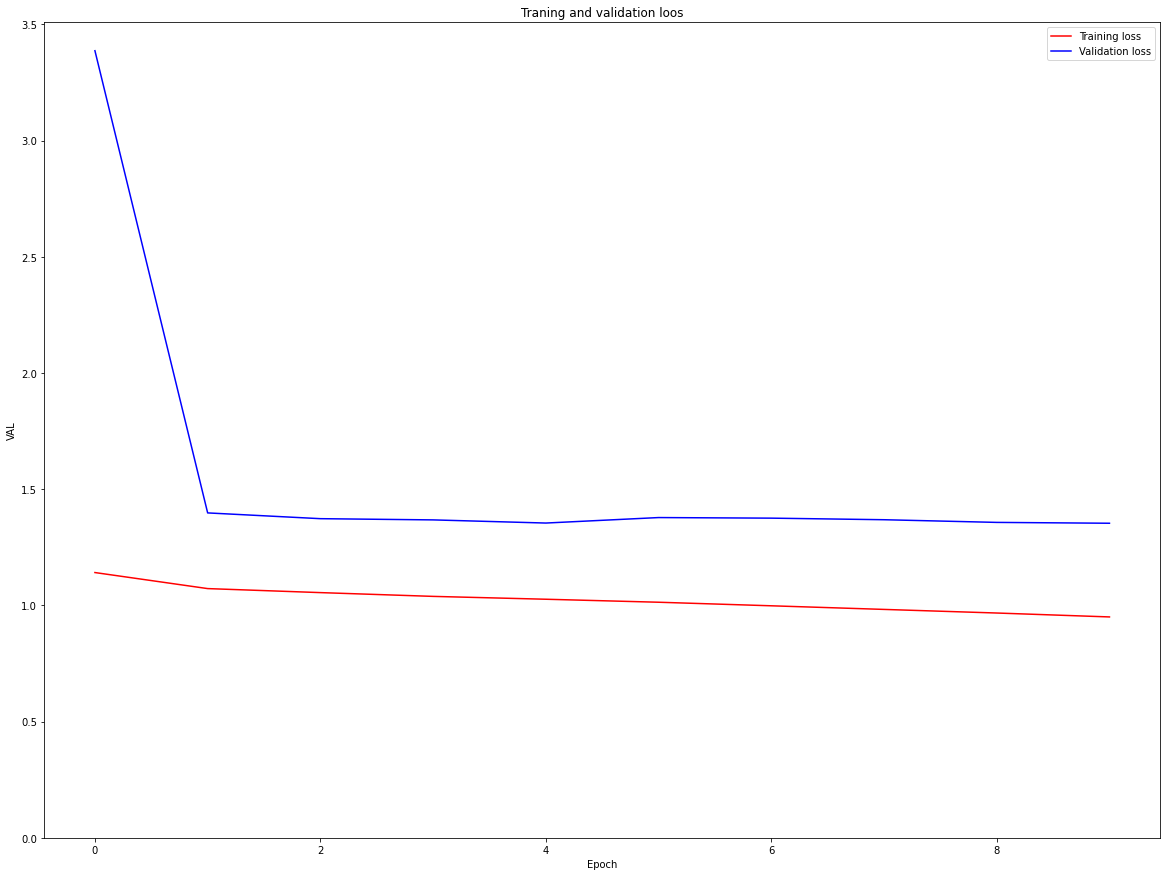

Start Validation
Done with 9% of train in epoch 10 
Seconds since start: 1132 
Seconds since last status: 12
Done with 19% of train in epoch 10 
Seconds since start: 1142 
Seconds since last status: 10
Done with 29% of train in epoch 10 
Seconds since start: 1153 
Seconds since last status: 10
Done with 39% of train in epoch 10 
Seconds since start: 1164 
Seconds since last status: 10
Done with 49% of train in epoch 10 
Seconds since start: 1174 
Seconds since last status: 10
Done with 59% of train in epoch 10 
Seconds since start: 1184 
Seconds since last status: 10
Done with 69% of train in epoch 10 
Seconds since start: 1195 
Seconds since last status: 10
Done with 79% of train in epoch 10 
Seconds since start: 1206 
Seconds since last status: 10
Done with 89% of train in epoch 10 
Seconds since start: 1216 
Seconds since last status: 10
Done with 99% of train in epoch 10 
Seconds since start: 1226 
Seconds since last status: 10
Epoch 10, training loss: 0.9342201830069461, validatio

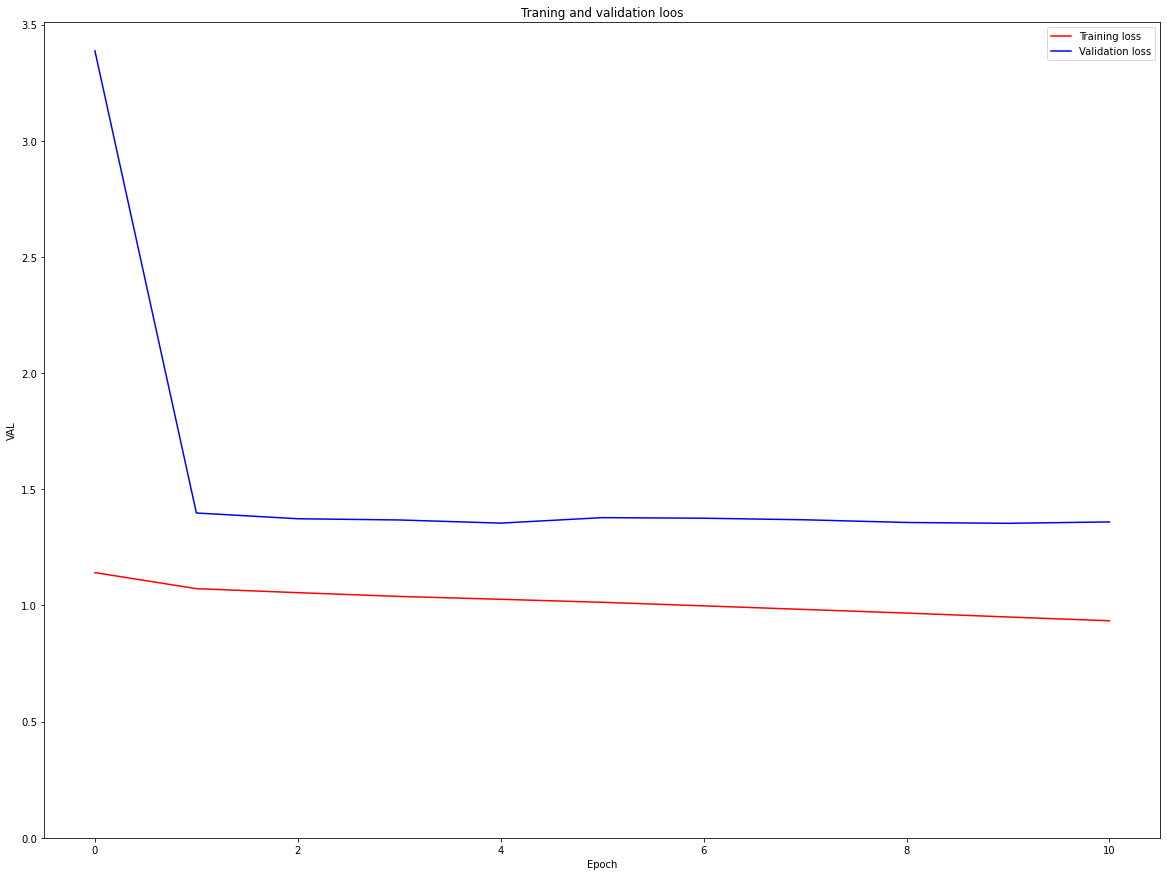

Start Validation
Done with 9% of train in epoch 11 
Seconds since start: 1239 
Seconds since last status: 12
Done with 19% of train in epoch 11 
Seconds since start: 1249 
Seconds since last status: 10
Done with 29% of train in epoch 11 
Seconds since start: 1260 
Seconds since last status: 10
Done with 39% of train in epoch 11 
Seconds since start: 1270 
Seconds since last status: 10
Done with 49% of train in epoch 11 
Seconds since start: 1281 
Seconds since last status: 10
Done with 59% of train in epoch 11 
Seconds since start: 1292 
Seconds since last status: 10
Done with 69% of train in epoch 11 
Seconds since start: 1302 
Seconds since last status: 10
Done with 79% of train in epoch 11 
Seconds since start: 1313 
Seconds since last status: 10
Done with 89% of train in epoch 11 
Seconds since start: 1323 
Seconds since last status: 10
Done with 99% of train in epoch 11 
Seconds since start: 1334 
Seconds since last status: 10
Epoch 11, training loss: 0.9188787786763982, validatio

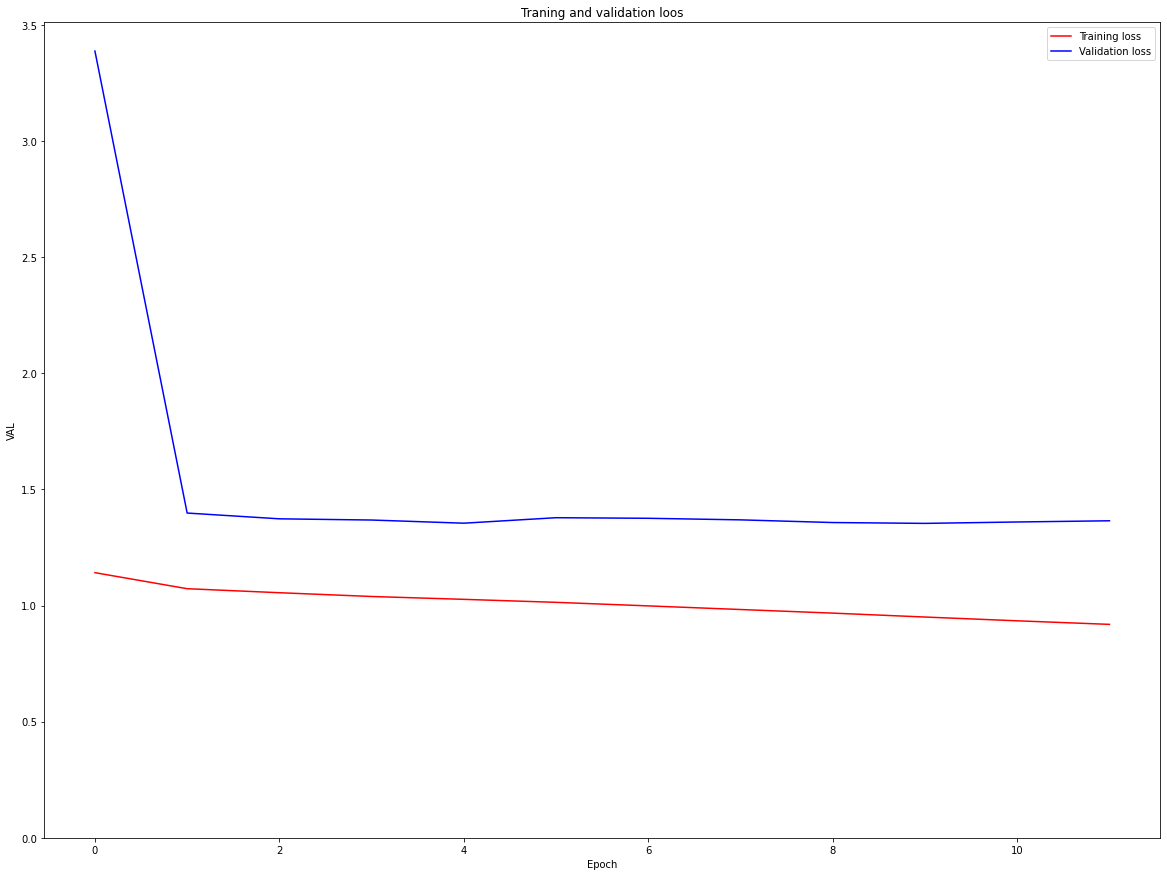

Start Validation
Done with 9% of train in epoch 12 
Seconds since start: 1347 
Seconds since last status: 12
Done with 19% of train in epoch 12 
Seconds since start: 1357 
Seconds since last status: 10
Done with 29% of train in epoch 12 
Seconds since start: 1368 
Seconds since last status: 10
Done with 39% of train in epoch 12 
Seconds since start: 1378 
Seconds since last status: 10
Done with 49% of train in epoch 12 
Seconds since start: 1389 
Seconds since last status: 10
Done with 59% of train in epoch 12 
Seconds since start: 1400 
Seconds since last status: 10
Done with 69% of train in epoch 12 
Seconds since start: 1410 
Seconds since last status: 10
Done with 79% of train in epoch 12 
Seconds since start: 1421 
Seconds since last status: 10
Done with 89% of train in epoch 12 
Seconds since start: 1431 
Seconds since last status: 10
Done with 99% of train in epoch 12 
Seconds since start: 1441 
Seconds since last status: 10
Epoch 12, training loss: 0.9028297534057782, validatio

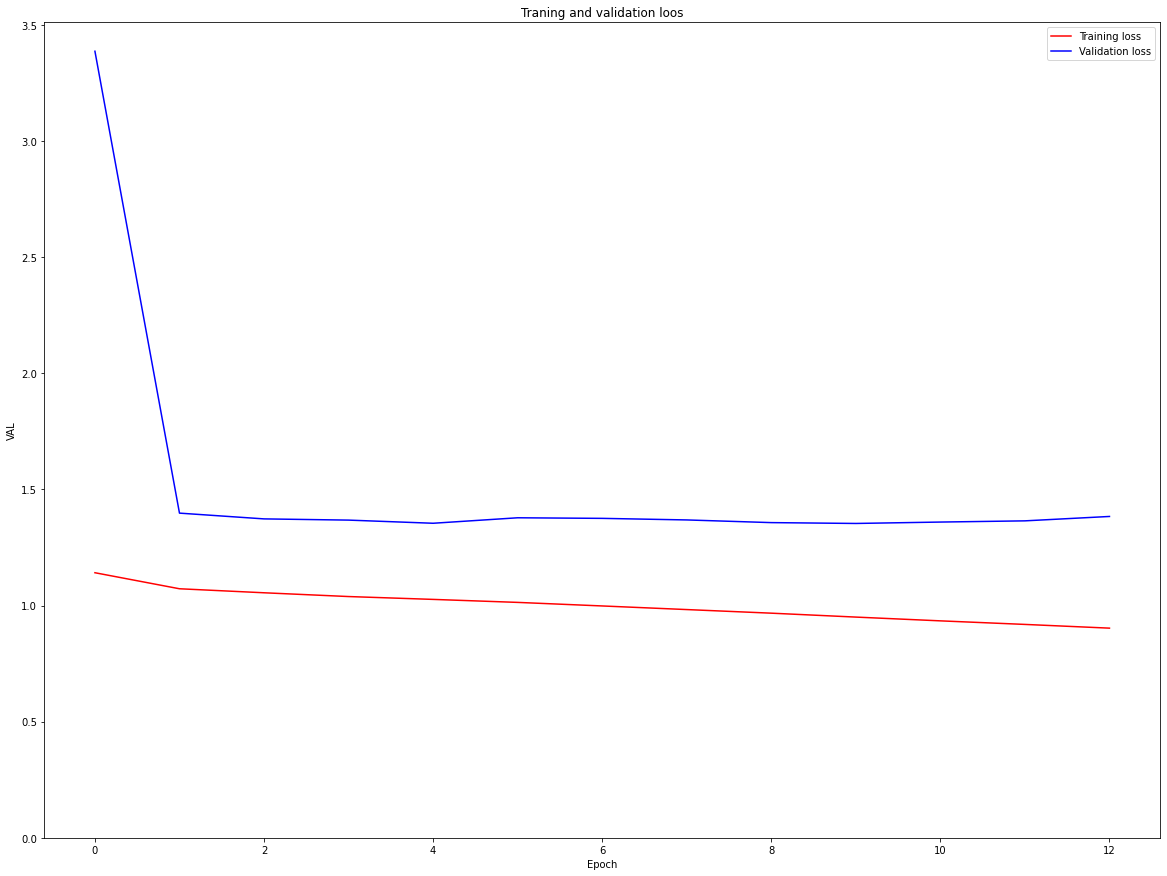

Start Validation
Done with 9% of train in epoch 13 
Seconds since start: 1453 
Seconds since last status: 11
Done with 19% of train in epoch 13 
Seconds since start: 1463 
Seconds since last status: 10
Done with 29% of train in epoch 13 
Seconds since start: 1473 
Seconds since last status: 9
Done with 39% of train in epoch 13 
Seconds since start: 1483 
Seconds since last status: 9
Done with 49% of train in epoch 13 
Seconds since start: 1493 
Seconds since last status: 9
Done with 59% of train in epoch 13 
Seconds since start: 1503 
Seconds since last status: 9
Done with 69% of train in epoch 13 
Seconds since start: 1512 
Seconds since last status: 9
Done with 79% of train in epoch 13 
Seconds since start: 1522 
Seconds since last status: 9
Done with 89% of train in epoch 13 
Seconds since start: 1532 
Seconds since last status: 9
Done with 99% of train in epoch 13 
Seconds since start: 1542 
Seconds since last status: 9
Epoch 13, training loss: 0.8919435544436477, validation loss: 

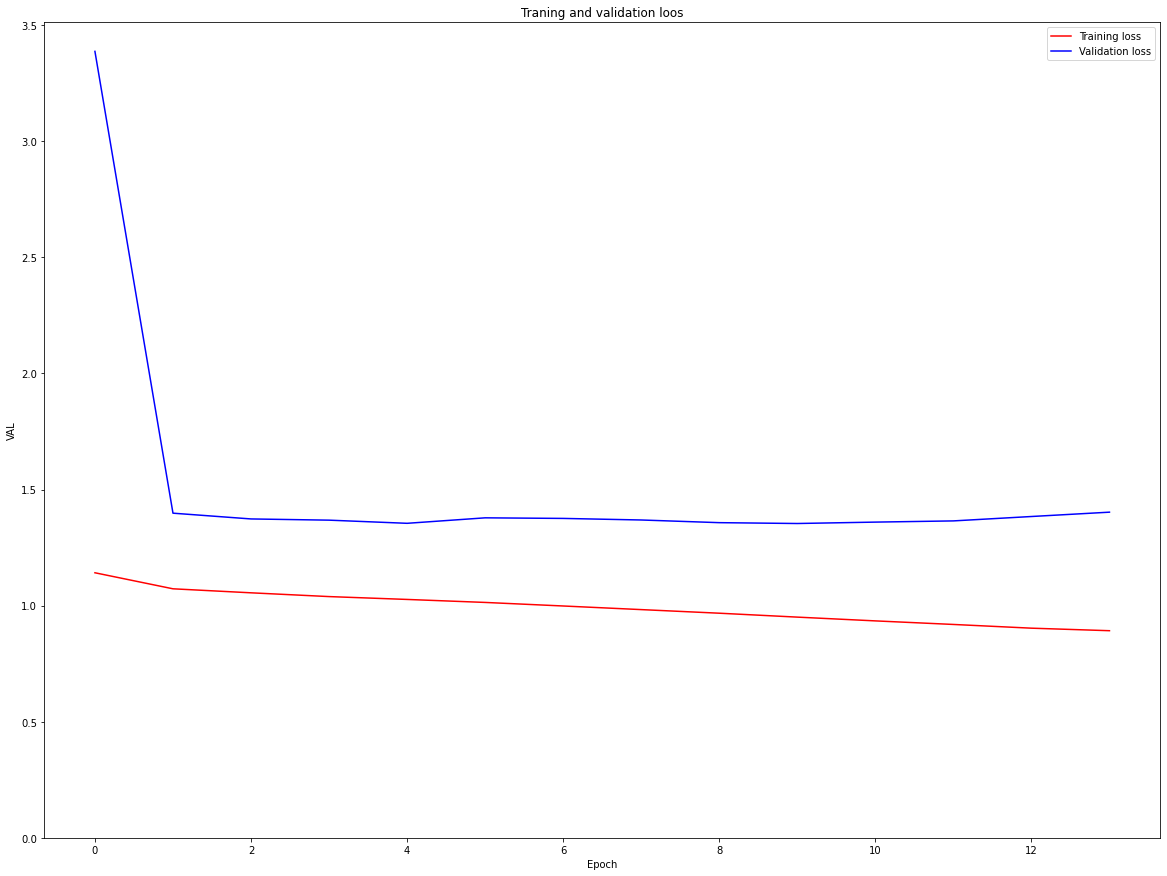

Start Validation
Done with 9% of train in epoch 14 
Seconds since start: 1554 
Seconds since last status: 11
Done with 19% of train in epoch 14 
Seconds since start: 1564 
Seconds since last status: 10
Done with 29% of train in epoch 14 
Seconds since start: 1574 
Seconds since last status: 10
Done with 39% of train in epoch 14 
Seconds since start: 1585 
Seconds since last status: 10
Done with 49% of train in epoch 14 
Seconds since start: 1595 
Seconds since last status: 10
Done with 59% of train in epoch 14 
Seconds since start: 1605 
Seconds since last status: 10
Done with 69% of train in epoch 14 
Seconds since start: 1615 
Seconds since last status: 10
Done with 79% of train in epoch 14 
Seconds since start: 1625 
Seconds since last status: 10
Done with 89% of train in epoch 14 
Seconds since start: 1635 
Seconds since last status: 10
Done with 99% of train in epoch 14 
Seconds since start: 1645 
Seconds since last status: 10
Epoch 14, training loss: 0.8783031108060109, validatio

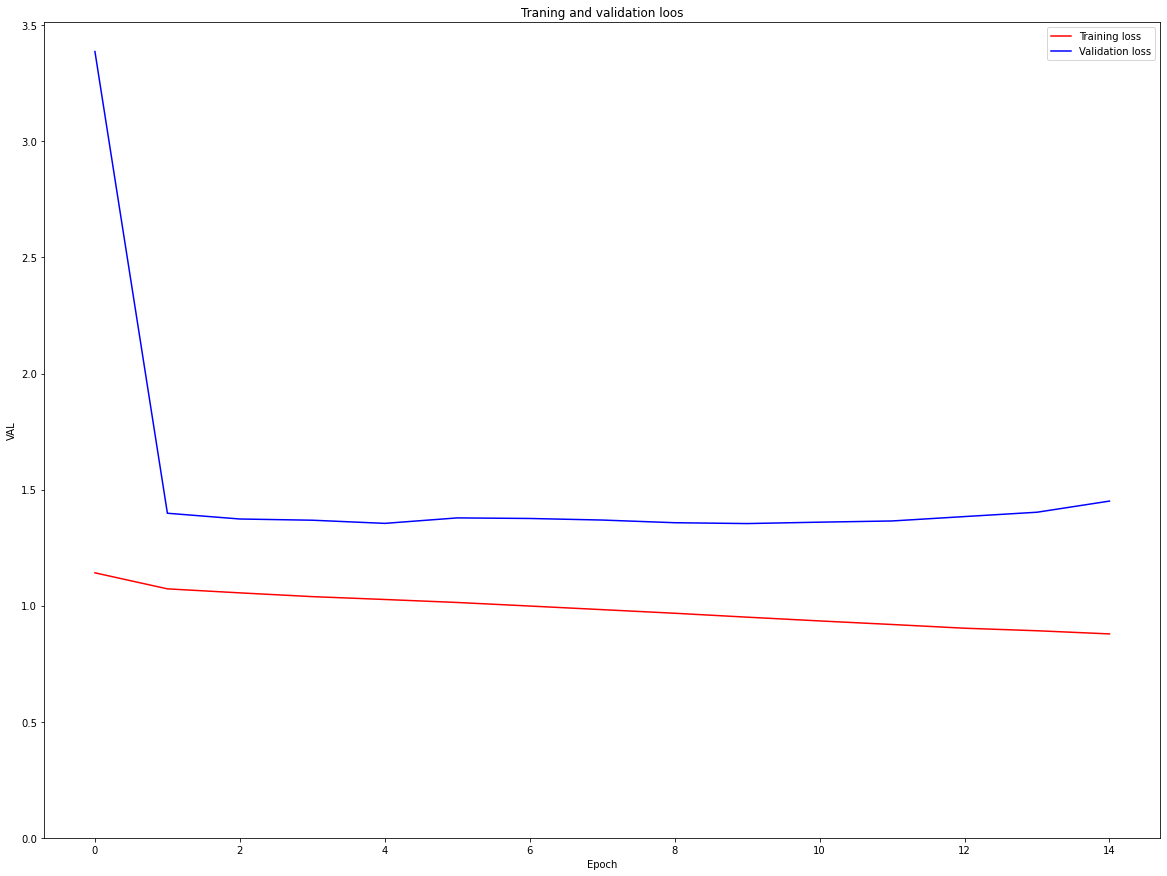

Start Validation
Done with 9% of train in epoch 15 
Seconds since start: 1657 
Seconds since last status: 11
Done with 19% of train in epoch 15 
Seconds since start: 1667 
Seconds since last status: 9
Done with 29% of train in epoch 15 
Seconds since start: 1677 
Seconds since last status: 9
Done with 39% of train in epoch 15 
Seconds since start: 1687 
Seconds since last status: 9
Done with 49% of train in epoch 15 
Seconds since start: 1697 
Seconds since last status: 9
Done with 59% of train in epoch 15 
Seconds since start: 1707 
Seconds since last status: 9
Done with 69% of train in epoch 15 
Seconds since start: 1717 
Seconds since last status: 10
Done with 79% of train in epoch 15 
Seconds since start: 1727 
Seconds since last status: 10
Done with 89% of train in epoch 15 
Seconds since start: 1737 
Seconds since last status: 10
Done with 99% of train in epoch 15 
Seconds since start: 1747 
Seconds since last status: 10
Epoch 15, training loss: 0.8659783268235502, validation los

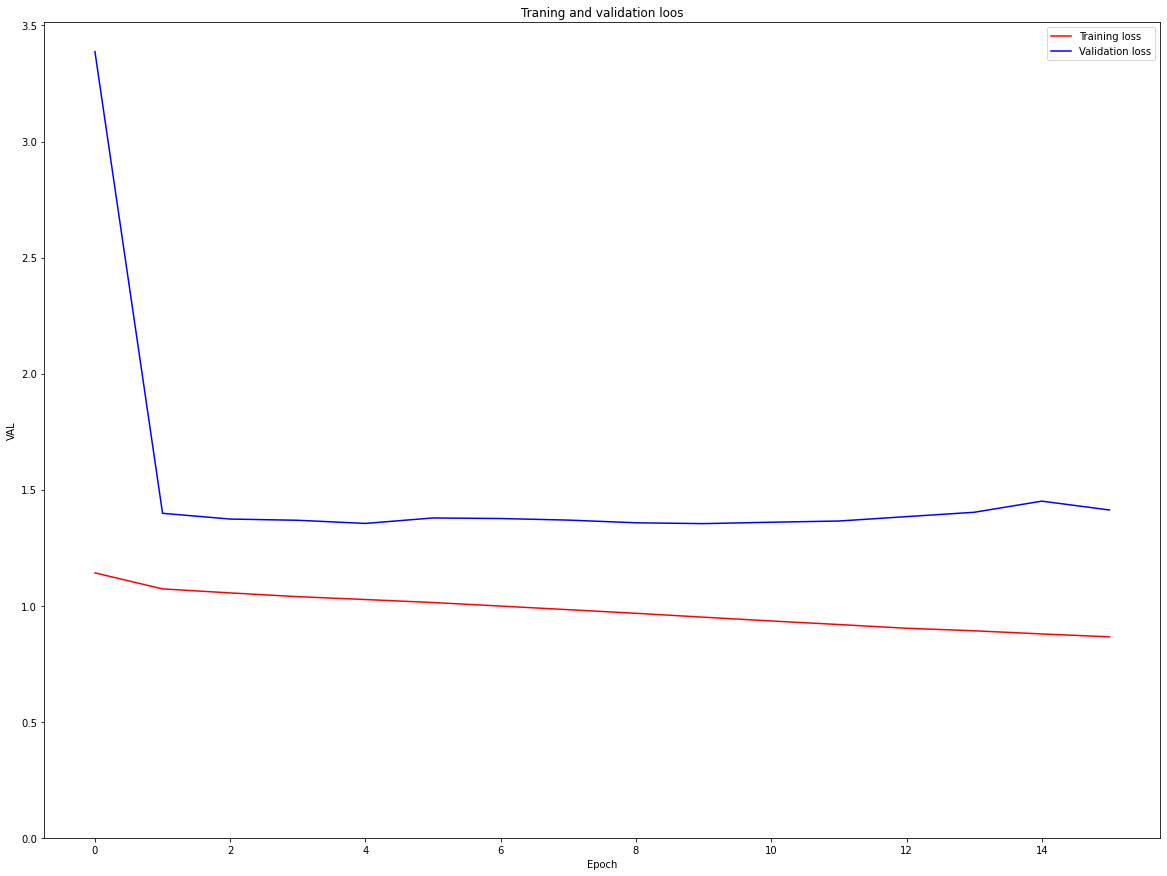

Start Validation
Done with 9% of train in epoch 16 
Seconds since start: 1759 
Seconds since last status: 12
Done with 19% of train in epoch 16 
Seconds since start: 1769 
Seconds since last status: 10
Done with 29% of train in epoch 16 
Seconds since start: 1780 
Seconds since last status: 10
Done with 39% of train in epoch 16 
Seconds since start: 1790 
Seconds since last status: 10
Done with 49% of train in epoch 16 
Seconds since start: 1800 
Seconds since last status: 10
Done with 59% of train in epoch 16 
Seconds since start: 1810 
Seconds since last status: 10
Done with 69% of train in epoch 16 
Seconds since start: 1821 
Seconds since last status: 10
Done with 79% of train in epoch 16 
Seconds since start: 1831 
Seconds since last status: 10
Done with 89% of train in epoch 16 
Seconds since start: 1841 
Seconds since last status: 10
Done with 99% of train in epoch 16 
Seconds since start: 1851 
Seconds since last status: 10
Epoch 16, training loss: 0.8539913589273103, validatio

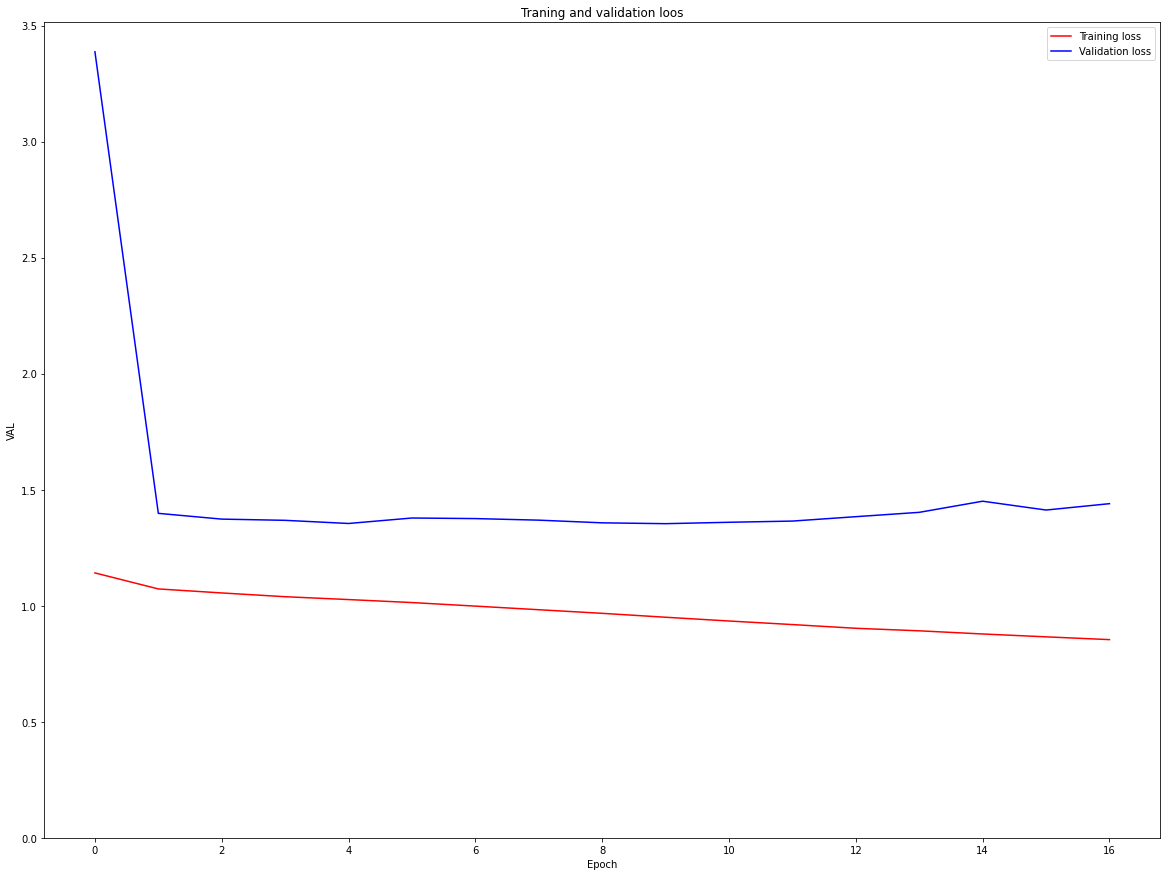

Start Validation
Done with 9% of train in epoch 17 
Seconds since start: 1863 
Seconds since last status: 12
Done with 19% of train in epoch 17 
Seconds since start: 1873 
Seconds since last status: 10
Done with 29% of train in epoch 17 
Seconds since start: 1884 
Seconds since last status: 10
Done with 39% of train in epoch 17 
Seconds since start: 1894 
Seconds since last status: 10
Done with 49% of train in epoch 17 
Seconds since start: 1904 
Seconds since last status: 10
Done with 59% of train in epoch 17 
Seconds since start: 1914 
Seconds since last status: 10
Done with 69% of train in epoch 17 
Seconds since start: 1925 
Seconds since last status: 10
Done with 79% of train in epoch 17 
Seconds since start: 1935 
Seconds since last status: 10
Done with 89% of train in epoch 17 
Seconds since start: 1945 
Seconds since last status: 10
Done with 99% of train in epoch 17 
Seconds since start: 1955 
Seconds since last status: 10
Epoch 17, training loss: 0.8411883186155262, validatio

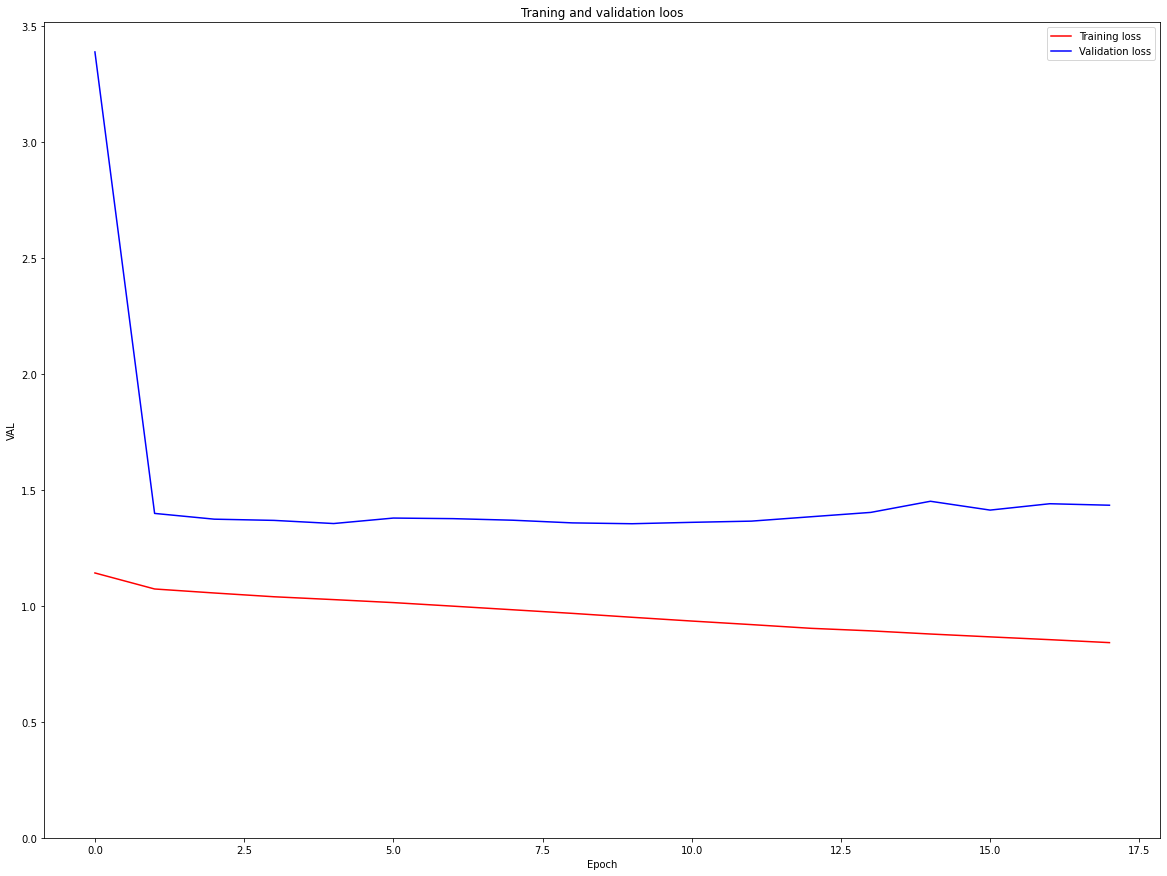

Start Validation
Done with 9% of train in epoch 18 
Seconds since start: 1968 
Seconds since last status: 12
Done with 19% of train in epoch 18 
Seconds since start: 1978 
Seconds since last status: 10
Done with 29% of train in epoch 18 
Seconds since start: 1988 
Seconds since last status: 10
Done with 39% of train in epoch 18 
Seconds since start: 1998 
Seconds since last status: 10
Done with 49% of train in epoch 18 
Seconds since start: 2008 
Seconds since last status: 9
Done with 59% of train in epoch 18 
Seconds since start: 2018 
Seconds since last status: 9
Done with 69% of train in epoch 18 
Seconds since start: 2028 
Seconds since last status: 9
Done with 79% of train in epoch 18 
Seconds since start: 2038 
Seconds since last status: 9
Done with 89% of train in epoch 18 
Seconds since start: 2048 
Seconds since last status: 9
Done with 99% of train in epoch 18 
Seconds since start: 2058 
Seconds since last status: 10
Epoch 18, training loss: 0.8316868845010325, validation los

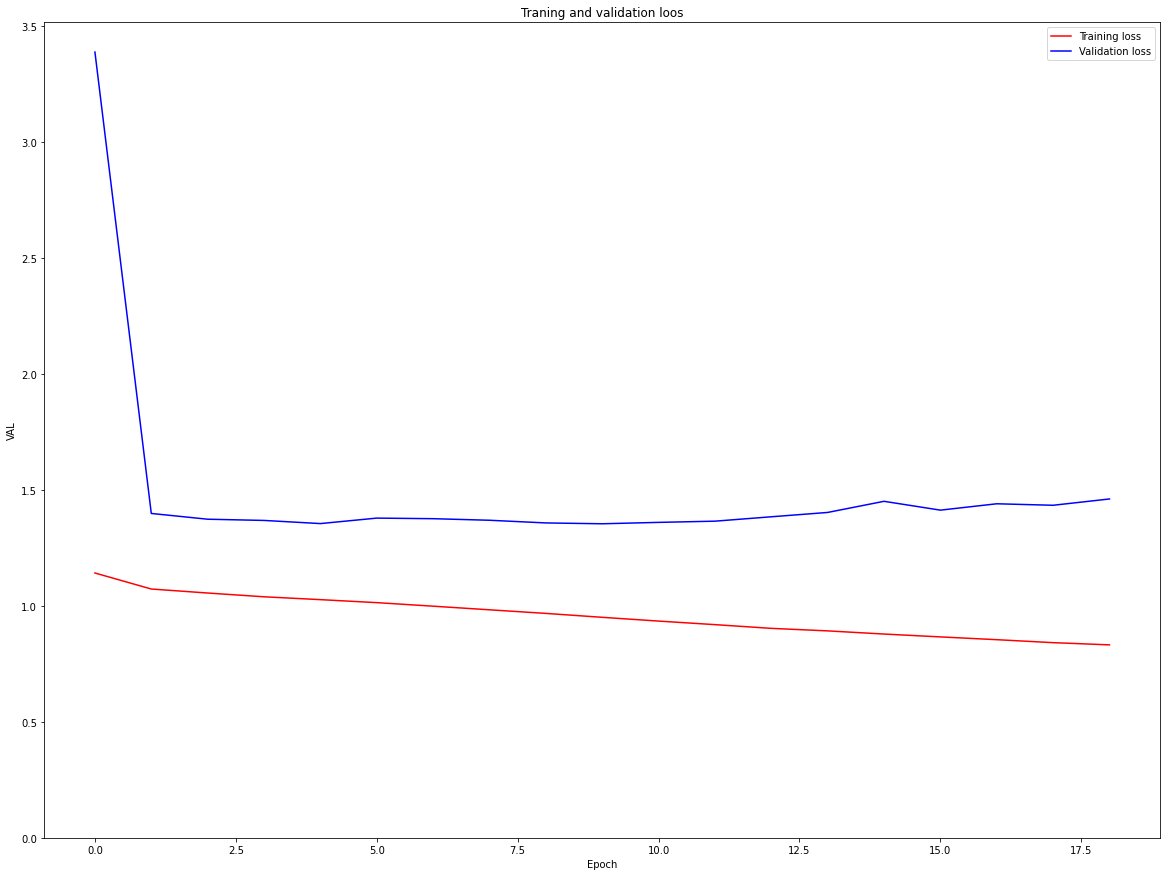

Start Validation
Done with 9% of train in epoch 19 
Seconds since start: 2070 
Seconds since last status: 11
Done with 19% of train in epoch 19 
Seconds since start: 2080 
Seconds since last status: 10
Done with 29% of train in epoch 19 
Seconds since start: 2090 
Seconds since last status: 9
Done with 39% of train in epoch 19 
Seconds since start: 2100 
Seconds since last status: 9
Done with 49% of train in epoch 19 
Seconds since start: 2110 
Seconds since last status: 10
Done with 59% of train in epoch 19 
Seconds since start: 2119 
Seconds since last status: 9
Done with 69% of train in epoch 19 
Seconds since start: 2129 
Seconds since last status: 9
Done with 79% of train in epoch 19 
Seconds since start: 2139 
Seconds since last status: 10
Done with 89% of train in epoch 19 
Seconds since start: 2149 
Seconds since last status: 9
Done with 99% of train in epoch 19 
Seconds since start: 2159 
Seconds since last status: 9
Epoch 19, training loss: 0.8222857525115226, validation loss

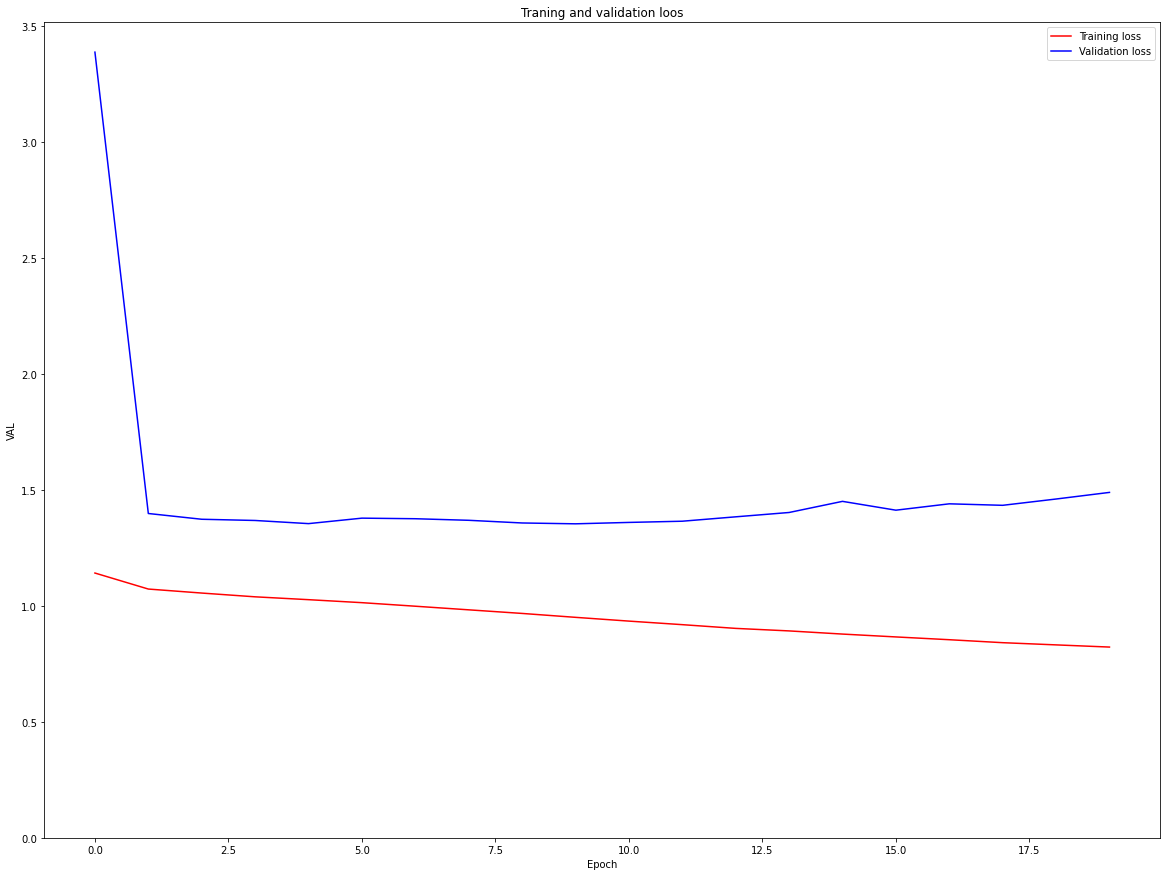

In [10]:
num_epochs = 20
itr = 0
# Save loss for plot
training_loss=[]
validation_loss=[]

print("Start Iter")

# Status parameters
# Print every x iter
data_train_iter=int(0.1*len(train_loader))

for epoch in range(num_epochs):
    # Track loss
    epoch_training_loss = 0
    epoch_validation_loss = 0
    
    model.eval()
    # For grid in validation set
    print("Start Validation")
    for i, (grid, label) in enumerate(validation_loader):
        
        # Load images as a torch tensor with gradient accumulation abilities
        grid = grid.view(SEQ_LEN_SLICES, 1, -1).requires_grad_()
        grid = grid.float()

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        # outputs.size() --> 100, 169
        outputs = model(grid)

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs[-1].unsqueeze(0), label.view(1,-1).float())

        # Getting gradients w.r.t. parameters
        epoch_validation_loss += loss.detach().numpy()

    model.train()

    # For grid in traning set
    for i, (grid, label) in enumerate(train_loader):
        if i%data_train_iter==0 and i>0: 
            print(f"Done with {int(i*100/len(train_loader))}% of train in epoch {epoch} \nSeconds since start: {(datetime.now()-t1).seconds} \nSeconds since last status: {(datetime.now()-t2).seconds}")
            t2=datetime.now()
        
        # Load images as a torch tensor with gradient accumulation abilities
        grid = grid.view(SEQ_LEN_SLICES, 1, -1).requires_grad_()
        grid = grid.float()

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        # outputs.size() --> 100, 169
        outputs = model(grid)

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs[-1].unsqueeze(0), label.view(1,-1).float())

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        # Update loss
        epoch_training_loss += loss.detach().numpy()
    # Save loss for plot
    training_loss.append(epoch_training_loss/len(train_loader))
    validation_loss.append(epoch_validation_loss/len(validation_loader))
    
    # Print loss every 10 epochs
    if epoch % 1 == 0:
        print(f'Epoch {epoch}, training loss: {training_loss[-1]}, validation loss: {validation_loss[-1]}')
        plt.figure(figsize=(20,15))
        _epoch = np.arange(len(training_loss))
        plt.plot(_epoch, training_loss, 'r', label='Training loss',)
        plt.plot(_epoch, validation_loss, 'b', label='Validation loss')
        plt.title("Traning and validation loos")
        plt.ylim((0))
        plt.legend()
        plt.xlabel('Epoch'), plt.ylabel('VAL')
        plt.show()
        clear_output(wait=True)



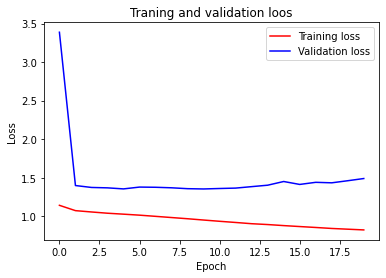

In [11]:
# Plot training and validation loss
epoch = np.arange(len(training_loss))
plt.figure()
plt.plot(epoch, training_loss, 'r', label='Training loss',)
plt.plot(epoch, validation_loss, 'b', label='Validation loss')
plt.title("Traning and validation loos")
plt.legend()
plt.xlabel('Epoch'), plt.ylabel('Loss')
plt.show()

### Saving stats

In [12]:
train_eval={'validation_loss':validation_loss,
 'traning_loss':training_loss
}
file_name=f'LSTMMODEL{type(model).__name__}_{type(criterion).__name__}_train_eval_stats_{datetime.now()}.json'
with open(file_name, 'w') as outfile:
    json.dump(train_eval, outfile)
with open(file_name) as json_file:
    data = json.load(json_file)

### Saving model



In [27]:
model_name=f'./state_dict/5-5-LSTM-100{type(model).__name__}_{type(criterion).__name__}_checkpoint_{datetime.now()}'
# Send dict to memory
torch.save(model.state_dict(), model_name)

## Performance Evaluation

In [10]:
ta_val=[]
out_val=[]
model.eval()
for i, (grid, label) in enumerate(test_loader):
        
    # Load images as a torch tensor with gradient accumulation abilities
    grid = grid.view(SEQ_LEN_SLICES, 1, -1).requires_grad_()
    grid = grid.float()

    outputs = model(grid)

    ta_v=label.view(5,5).detach().squeeze().numpy()
    ta_val.append(ta_v)
    
    ou_v=outputs[-1].view(5,5).squeeze().detach().numpy()
    out_val.append(ou_v)

        
    if i%100==0:
        print(f"Done with {int(i)*100/len(test_loader)}\n")

Done with 0.0

Done with 10.845986984815617

Done with 21.691973969631235

Done with 32.53796095444685

Done with 43.38394793926247

Done with 54.229934924078094

Done with 65.0759219088937

Done with 75.92190889370933

Done with 86.76789587852494

Done with 97.61388286334056



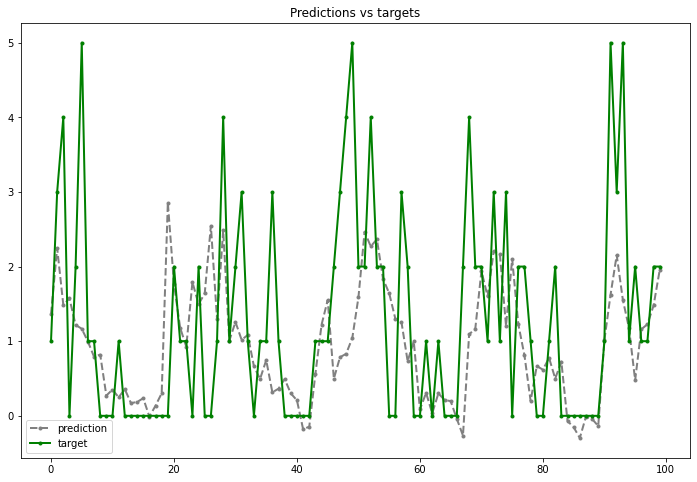

In [13]:
# Cell to plot
CELL=(4,2)
plt.figure(figsize=(12,8))

# Parameters
offset=0
data_points=100

# Don't touch
lim=offset+data_points
assert lim<len(out_val)
t=[i for i in range(len(out_val[offset:lim]))]
plt.plot(t, [x[CELL] for x in out_val][offset:lim], color='grey', marker='o', linestyle='dashed', linewidth=2, markersize=3, label='prediction')
plt.plot(t, [x[CELL] for x in ta_val][offset:lim], color='green', marker='o', linestyle='solid', linewidth=2, markersize=3, label='target')
plt.legend()
plt.title("Predictions vs targets")
plt.show()

## Calculate accuracy

In [14]:
def calculate_absolute(inp, lab):
    return np.sum(np.abs(lab-inp))
def calculate_relative(inp, lab, mean_grid):
    return np.sum(np.abs(lab-inp)/(1+mean_grid))

In [16]:
abs_v = np.mean(np.abs(list(map(calculate_absolute,out_val,ta_val))))
rel_v = np.mean(np.abs(list(map(calculate_relative,out_val,ta_val,train_data.mean_grid))))
print(abs_v,rel_v)

20.730632594998706 16.098754567600235


In [17]:
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(total_params)

53325


In [18]:
# Save results
with open('baselineLSTM.npy', 'wb') as f:
    np.save(f, out_val)